# Subsetting

Review core methods to select data from a `pandas.DataFrame`

## Read in CSV

To read in a CSV file into our Python workspace as a `pandas.DataFrame` we use the `pandas.read_csv` function: 

In [1]:
import pandas as pd

# Read in file, argument is the file path as a string
df = pd.read_csv('data/wetlands_seasonal_bird_diversity.csv')

# Print df's first five rows
df.head()

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
0,2010,39.0,40.0,50.0,45.0,NaN,61.0,NaN,75.0,85.0,NaN,NaN,81.0
1,2011,48.0,44.0,NaN,58.0,52.0,NaN,78.0,74.0,NaN,67.0,70.0,NaN
2,2012,51.0,43.0,49.0,57.0,58.0,53.0,71.0,72.0,73.0,70.0,63.0,69.0
3,2013,42.0,46.0,38.0,60.0,58.0,62.0,69.0,70.0,70.0,69.0,74.0,64.0
4,2014,38.0,43.0,45.0,49.0,52.0,57.0,61.0,78.0,71.0,60.0,81.0,62.0


Birds were surveyed in four wetlands:

- Carpinteria Salt Marsh (CSM)\
- Mugu Lagoon (MUL)
- San Dieguito Wetland (SDW)
- Tijuana Estuary (TJE)

Values from second column to the last colum = number of different bird species recorded across the survey sites in each wetlands during spring, winter, and fall, for a given year. 

year column = year on which data was collected

In [2]:
# Print df's column names
df.columns

Index(['year', 'CSM_winter', 'CSM_spring', 'CSM_fall', 'MUL_winter',
       'MUL_spring', 'MUL_fall', 'SDW_winter', 'SDW_spring', 'SDW_fall',
       'TJE_winter', 'TJE_spring', 'TJE_fall'],
      dtype='object')

In [3]:
# List dtypes of each column 
df.dtypes

year            int64
CSM_winter    float64
CSM_spring    float64
CSM_fall      float64
MUL_winter    float64
MUL_spring    float64
MUL_fall      float64
SDW_winter    float64
SDW_spring    float64
SDW_fall      float64
TJE_winter    float64
TJE_spring    float64
TJE_fall      float64
dtype: object

In [4]:
# Print df's shape: output is a tuple (# rows, # columns)
df.shape

(14, 13)

## Selecting a single column

Simplest case: select a single column by column name

General syntax:

```python
df['column_name']
```

This is an example of **label-based, subsetting**, which means we want to select data from our df using *names* of the columns, not their position. 

### Example
Select number of bird species observed at Mugu Lagoon in spring

In [5]:
# Select a single column by using square brackets
mul_spring = df['MUL_spring']

mul_spring

0      NaN
1     52.0
2     58.0
3     58.0
4     52.0
5     50.0
6     48.0
7     54.0
8     54.0
9     52.0
10     NaN
11    55.0
12    55.0
13    59.0
Name: MUL_spring, dtype: float64

In [6]:
# Confirm the type of output
print(type(mul_spring))

<class 'pandas.core.series.Series'>


Recall: we can think of `pandas.DataFrame` as a dictionary of its columns. 
Then, we can access a single column using the column name as the *key*, just like we would in a dictionary:

`df['column_name']`

We can also do label-based subsetting of a single column using attribute syntax:
```python
df.column_name
```

Example:


In [7]:
df.MUL_spring

0      NaN
1     52.0
2     58.0
3     58.0
4     52.0
5     50.0
6     48.0
7     54.0
8     54.0
9     52.0
10     NaN
11    55.0
12    55.0
13    59.0
Name: MUL_spring, dtype: float64

**Favor `df['column_name']` instead of `df.column_name`**

Why? 

- `df['column_name']` avoids conflicts with `pd.DataFrames` methods and attributes. For example, if `df` has a column named `count`, its ambigous whether `pd.count` is referring to the `count()` method or the `count` column.
- `df['column_name']` can take any column name
- `df.column` only works if the column name has no spaces or special characters

## Selecting multiple columns...

### ....using a list of column names

Select multiple columns in a single call by passing a list of column names to square brackets `[]`

```python
df[ ['col1', 'col2', 'col3'] ]
```

Notice the "double square brackets". This is because we are passing the list of names `['col1', 'col2', 'col3']` to the selection brackets `[]`

## Check-in

Is this label-based or location-based?

### Example

In [8]:
# Select columns with names `TJE_winter` and `TJE_fall`
tje_wf = df[['TJE_winter', 'TJE_fall']]
tje_wf

,TJE_winter,TJE_fall
0,NaN,81.0
1,67.0,NaN
2,70.0,69.0
3,69.0,64.0
4,60.0,62.0
5,73.0,64.0
6,76.0,58.0
7,72.0,57.0
8,66.0,55.0
9,63.0,50.0


In [9]:
print(type(tje_wf))

<class 'pandas.core.frame.DataFrame'>


### ... using a slice

To select a slice of the columns we will use a special case of **`loc` selection***. General Syntax:
```python
df.loc[ : , 'column_start':'column_end']

`column_start` and `column_end` = the starting and ending points of the column slice we want to subset from the data frame. 

Notice: 
    
- the first value passed to `loc` is used for selecting rows, using a colon `:` as the row-selection parameter means "select all the rows"

- the slice of the resulting data frame includes both endpoints of the slice. 

In [10]:
# Select columns between 'CSM_winter' and 'MUL_fall'
csm_mul = df.loc[:, 'CSM_winter':'MUL_fall']
csm_mul.head()

,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall
0,39.0,40.0,50.0,45.0,NaN,61.0
1,48.0,44.0,NaN,58.0,52.0,NaN
2,51.0,43.0,49.0,57.0,58.0,53.0
3,42.0,46.0,38.0,60.0,58.0,62.0
4,38.0,43.0,45.0,49.0,52.0,57.0


## Selecting rows...

### ... using a condition
To select rows that satisfy a particular condition the general syntax is 
```python
df[condition_on_rows]
```

The `condition_on_rows` can be many things, let's see some usual scenarios.

### Example

We are interested in data after 2020. 

In [11]:
# select all rows with year > 2020
post_2020 = df[ df['year'] > 2020]
post_2020

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
11,2021,47.0,44.0,53.0,54.0,55.0,60.0,57.0,58.0,57.0,53.0,68.0,51.0
12,2022,40.0,46.0,49.0,60.0,55.0,65.0,57.0,60.0,57.0,60.0,61.0,60.0
13,2023,56.0,43.0,36.0,72.0,59.0,53.0,64.0,63.0,33.0,60.0,56.0,38.0


Condition for our rows = `df['year'] > 2020`
this is a `pandas.Series` with a boooooolean values (`True` or `False`) indicating which rows satisfy the condition
year > 2020


In [12]:
# Check the type of df['year'] > 2020
print(type(df['year'] > 2020))

<class 'pandas.core.series.Series'>


In [13]:
# Print the boolean series
df['year'] > 2020

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11     True
12     True
13     True
Name: year, dtype: bool

When we pass such a series of boolean values to the selection brackets `[]` we keep only the rows that correspond to a `True` value.

## Check-in 

Get the subset of the data frame on which the San Dieguito Wetland has at least 75 species recorded during spring. 

In [15]:
sdw_spring = df[df['SDW_spring'] >= 75]
sdw_spring

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
0,2010,39.0,40.0,50.0,45.0,NaN,61.0,NaN,75.0,85.0,NaN,NaN,81.0
4,2014,38.0,43.0,45.0,49.0,52.0,57.0,61.0,78.0,71.0,60.0,81.0,62.0


#### Example

We want to look at data fromo years 2012 to 2015 including both years. 
We can use this `between` method in our condition:

In [16]:
subset = df[ df['year'].between(2012, 2015)]
subset

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
2,2012,51.0,43.0,49.0,57.0,58.0,53.0,71.0,72.0,73.0,70.0,63.0,69.0
3,2013,42.0,46.0,38.0,60.0,58.0,62.0,69.0,70.0,70.0,69.0,74.0,64.0
4,2014,38.0,43.0,45.0,49.0,52.0,57.0,61.0,78.0,71.0,60.0,81.0,62.0
5,2015,44.0,42.0,45.0,58.0,50.0,51.0,71.0,61.0,65.0,73.0,76.0,64.0


Let's break it down:

1. df['year'] = column with the year values, a `panda.Series`
2. in `df['year'].between()` we are accessing a method for the `panda.Series` using `.`
3. (2012, 2015) = parameters, this includes both endpoints.
4. `df['year'].between(2012, 2015)` = `panda.Series` of boolean values indicating which rows have year value between 2012 and 2015
5. when we put `df['year'].between(2012,2015)' inside the selection brakcets `[]` we obtain the rows we wanted to select

## Avoid using `loc` for selecting only rows

It is equivalent to write the following two:

In [ ]:
# Select rows with year < 2015
df[df['year'] < 2015]

In [ ]:
# Select rows with year < 2015 using loc
df.loc[ df['year']<2015, :]

We prefer the first syntax because it is simpler: 

### using multiple conditions

We can combine multiple conditions to select rows by surrounding each condition in parenthesis `()` and using the or operator `|` and the and operator `&`

## Example: or
Select rows in which CSM has more than 50 species registered in winter *or* fall:

In [17]:
df[ (df['CSM_winter']>50) | (df['CSM_fall']>50) ]

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
2,2012,51.0,43.0,49.0,57.0,58.0,53.0,71.0,72.0,73.0,70.0,63.0,69.0
11,2021,47.0,44.0,53.0,54.0,55.0,60.0,57.0,58.0,57.0,53.0,68.0,51.0
13,2023,56.0,43.0,36.0,72.0,59.0,53.0,64.0,63.0,33.0,60.0,56.0,38.0


## Example: and
Select rows in which both the CSM and SDW have more than 60 species during spring

In [19]:
df[ (df['CSM_spring']>60) & (df['SDW_spring']>60) ]

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall


An empty data frame! That's ok, it just means no rows satisfy the conditions.

## Select rows by position

Sometimes we may want to select certain rows based on their *actual position* in the data frame. In other words, using **position-based subsetting**

To do this, we use **iloc selection** syntax:

```python
df.iloc[row-indices]
```

`iloc`= stands for integer-location based indexing

## Example: 

In [20]:
# Select the fifth row (index = 4)

df.iloc[4]

year          2014.0
CSM_winter      38.0
CSM_spring      43.0
CSM_fall        45.0
MUL_winter      49.0
MUL_spring      52.0
MUL_fall        57.0
SDW_winter      61.0
SDW_spring      78.0
SDW_fall        71.0
TJE_winter      60.0
TJE_spring      81.0
TJE_fall        62.0
Name: 4, dtype: float64

In [25]:
# Select from the 10th through 13th, including 13
df.iloc[9:14]

,year,CSM_winter,CSM_spring,CSM_fall,MUL_winter,MUL_spring,MUL_fall,SDW_winter,SDW_spring,SDW_fall,TJE_winter,TJE_spring,TJE_fall
9,2019,39.0,39.0,40.0,57.0,52.0,53.0,54.0,55.0,53.0,63.0,54.0,50.0
10,2020,46.0,NaN,47.0,56.0,NaN,66.0,57.0,NaN,58.0,54.0,40.0,54.0
11,2021,47.0,44.0,53.0,54.0,55.0,60.0,57.0,58.0,57.0,53.0,68.0,51.0
12,2022,40.0,46.0,49.0,60.0,55.0,65.0,57.0,60.0,57.0,60.0,61.0,60.0
13,2023,56.0,43.0,36.0,72.0,59.0,53.0,64.0,63.0,33.0,60.0,56.0,38.0


### Selecting rows and columns simultaneously 

Can be done using `loc()` (labels) or `iloc` (positions). 

### ... by labels or conditions
When we want to select rows and column simultaneously by labels (including using conditions) we can use `loc` selection with the syntax:

```python
df.loc[row-selection, column-selection]
```

Example:

Select winter surveys from the MUL and TJE after 2020

In [27]:
df.loc[ df['year']>2020 , ['MUL_winter','TJE_winter']]

,MUL_winter,TJE_winter
11,54.0,53.0
12,60.0,60.0
13,72.0,60.0


## Selecting by position

Suppose we want to select rows 3-7 (including) and the 4th and 5th column

In [28]:
df.iloc[3:8, [3,4]]

,CSM_fall,MUL_winter
3,38.0,60.0
4,45.0,49.0
5,45.0,58.0
6,47.0,63.0
7,43.0,57.0


## Notes about `iloc` and `loc`

### Which one does what? 

Remember that the `i` in `iloc` stands for integer location and it uses integer indexing the same way as indexing for python list.

### `iloc` for column selection? AVOID IT!

We can also access columns by position using `iloc` - but best not to if possible. 

Unless you are *really* looking for info about the nth column, **do not access a column by position**. This can break in many ways:

1. it relies on you correctly counting the position of a column. Even with a small dataset this can be prone to error.

2. it is not explicit: if we want info about that column, then use `df['SDW_spring']`

## Method Chaining

The code using the check-in `df.set_index('year').loc[:,'SDW_winter':'TJE_fall'].plot()` is an example of **method chaining**
Each method in the chain returns an object, allowing the next method to be called directly on the results. Greate technique to make your code concise and readable. 

You can also break lines in method chaining

<AxesSubplot:xlabel='year'>

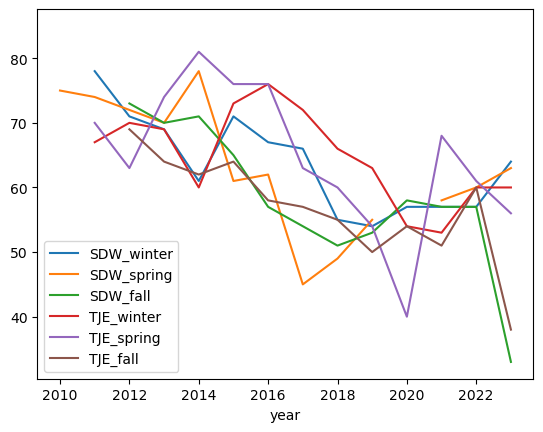

In [29]:
(df.set_index('year')
 .loc[:, 'SDW_winter':'TJE_fall']
 .plot()
)

## About the data

We will use the Palmer penguins dataset. 
Data about size measurements for three penguin species in the Palmer Archipelago, during 2007, 2008, and 2009

In [30]:
# Load the data
URL = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv'
penguins = pd.read_csv(URL)

In [31]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [32]:
# Check the column data types and NA values
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [34]:
# Count unique values in categorical columns and year
penguins[['species', 'island', 'sex', 'year']].nunique()

species    3
island     3
sex        2
year       3
dtype: int64

In [35]:
# Get unique value in species column
penguins['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [36]:
# Count per unique value in species column
penguins['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

# `kind` argument in `plot()`

`plot()` method creates a line plot by default. 
If we change the value of the `kind` parameter we can create different kinds of plots. 

Example: scatterplot

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

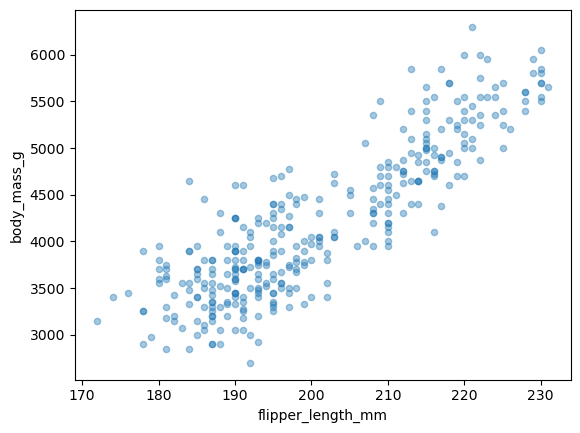

In [47]:
# Compare the flipper length against the body mass using scatterplot
penguins.plot(kind = 'scatter',
             x = 'flipper_length_mm',
             y = 'body_mass_g',
             alpha = 0.4)